 ##                                             Fake Job Posting Prediction

## 1) Importing Library 
I started yo import all the libraries which I need. In there, I import some models library(MultinominalNB and LinearSVC)and some preprocessing library for the data cleaning.

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from collections import defaultdict
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2) Importing the dataset and describing 

In [171]:
data = pd.read_csv("C:/Users/HP/Desktop/fake_job_postings.csv")

In [172]:
data.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [174]:
data.shape

(17880, 18)

In [175]:
data.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

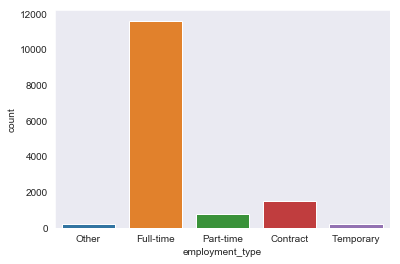

In [176]:
sns.countplot(data.employment_type)

## 3) Preprocessing step 
In this step, I start to look at my dataset to fill the NA data to space. After that, I keep going on with merge the all columns into a column which is all_text. So, I can clean the dataset. 

In [177]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [178]:
data.fillna(" ",inplace = True)

In [179]:
data["all_text"] = data["title"] + " " + data["location"] + " " + data["department"] + " " + data["company_profile"] + " " + data["description"] + " " + data["requirements"] + " " + data["benefits"] + " " + data["employment_type"] + " " + data["required_experience"] + " " + data["required_education"] + " " + data["industry"] + " " + data["function"]

In [180]:
data

job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manager   
5           6                                   Accounting Clerk   
6           7                              Head of Content (m/f)   
7           8                   Lead Guest Service Specialist      
8           9                                         HP BSM SME   
9          10            Customer Service Associate - Part Time    
10         11  ASP.net Developer Job opportunity at United St...   
11         12      Talent Sourcer (6 months fixed-term contract)   
12         13                   Applications Developer, Digital    
13         14                                         Installers   
14         15                         Account Executive - Sydney   
15         16                         VP of Sales - Vault Dragon   
16         17                                Hands-On QA Leader    
17         18  Southend-on-Sea Traineeships Under NAS 16-18 Y...   
18         19                                    Visual Designer   
19         20  Process Controls Engineer - DCS PLC MS Office ...   
20         21                                Marketing Assistant   
21         22                             Front End Developer      
22         23                                Engagement Manager    
23         24  Vice President, Sales and Sponsorship (Busines...   
24         25                                  Customer Service    
25         26                          H1B SPONSOR FOR L1/L2/OPT   
26         27                                     Marketing Exec   
27         28           HAAD/DHA Licensed Doctors Opening in UAE   
28         29                  Talent Management Process Manager   
29         30                        Customer Service Associate    
...       ...                                                ...   
17850   17851  North West Level 2 and 3 DGV NVQ Assessors Under    
17851   17852              Warehouse Operator / Material Handler   
17852   17853                                         GWT Expert   
17853   17854                      Call Center/Customer Service    
17854   17855                  Talent Management Process Manager   
17855   17856                                   Android Engineer   
17856   17857                         Web Developer - Marketing    
17857   17858  Chief Technology Officer (CTO) for a fast grow...   
17858   17859   Pharmaceutical Senior Project Manager Consultant   
17859   17860     Immediate Requirement: iOS Developer for Qatar   
17860   17861                                 Sr. SQL Server DBA   
17861   17862                           Junior Embedded Engineer   
17862   17863                                Clinical Supervisor   
17863   17864                  Implementation Support Specialist   
17864   17865                      Next Generation Depth Sensing   
17865   17866  Portfolio Development Associate - Paris & rest...   
17866   17867                             Post Production Editor   
17867   17868                                   Admin Assistant    
17868   17869                                     CNC Programmer   
17869   17870                             Sr Technical Lead LIMS   
17870   17871                 Senior Financial Analyst (Retail)    
17871   17872                                 Water Truck Driver   
17872   17873                                    Product Manager   
17873   17874                             Recruiting Coordinator   
17874   17875                               JavaScript Developer   
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountan

I consider the text as a sequence of words can be a reasonable choice. And, I used to find boundaries of words by splitting sentences by space of punctuation. So, I am going to convert text to lowercase. After that, I keep going with Lemmatization. It is the process of grouping together the inflected forms of a word so they can be analyzed as a single item, identified by the word’s lemma, or dictionary form.

In [181]:
data['all_text'] = [entry.lower() for entry in data['all_text']]

In [182]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
print(data['all_text'])
data['last_text'] = data['all_text'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))
print(data['last_text'])

0        marketing intern us, ny, new york marketing we...
1        customer service - cloud video production nz, ...
2        commissioning machinery assistant (cma) us, ia...
3        account executive - washington dc us, dc, wash...
4        bill review manager us, fl, fort worth   spots...
5        accounting clerk us, md,      job overviewapex...
6        head of content (m/f) de, be, berlin androidpi...
7        lead guest service specialist    us, ca, san f...
8        hp bsm sme us, fl, pensacola   solutions3 is a...
9        customer service associate - part time  us, az...
10       asp.net developer job opportunity at united st...
11       talent sourcer (6 months fixed-term contract) ...
12       applications developer, digital  us, ct, stamf...
13       installers us, fl, orlando   growing event pro...
14       account executive - sydney au, nsw, sydney sal...
15       vp of sales - vault dragon sg, 01, singapore s...
16       hands-on qa leader  il, , tel aviv, israel  r&.

In the below codes, I consider with removal stop words. These are the most common words in a language like 'some', 'more', 'its'. When I remove all of the stop words the sentence becomes more cleaner.

In [183]:
stop_words = set(stopwords.words('english'))

In [184]:
print(stop_words)

{'some', 'more', 'its', 'against', 'he', 'will', 'what', 'too', "she's", 'there', 'can', 'our', 'such', 'am', 'couldn', 'hasn', "isn't", 'his', 'yourself', 'than', 'while', 'these', 'needn', 'she', 'did', 'other', 'has', 's', "hadn't", 'about', 'being', 'with', 'same', 'all', 'have', "should've", 'm', 'any', 'most', 'didn', "you'll", 'yours', 'into', 'as', "weren't", 'shan', 'in', 'been', 'itself', 'through', 'both', 'him', "won't", 'll', 'nor', 'now', 'weren', 'until', 'so', 'should', 'an', 'during', 'then', 'y', 'is', 'out', "didn't", 've', 'each', 'mightn', 'ourselves', 'my', 'mustn', 'does', 'doing', 'i', "shan't", 'by', 'hadn', "you've", 'when', 'few', 'over', 't', 'are', 'them', 'a', 'o', 'd', 'her', "you'd", 'whom', 'don', 'under', "haven't", 'won', 'having', 'theirs', 'here', 'not', 'off', 'or', 'isn', "wouldn't", 'were', 'again', "wasn't", 'who', 'ain', 'just', "mustn't", "it's", 'before', 'how', 'and', "couldn't", 'but', 'hers', 're', "needn't", 'up', 'from', 'why', 'those', 

In [185]:
data['last_text'] = data['last_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(data['last_text'])

0        market intern us, ny, new york market we're fo...
1        customer service - cloud video production nz, ...
2        commission machinery assistant (cma) us, ia, w...
3        account executive - washington dc us, dc, wash...
4        bill review manager us, fl, fort worth spotsou...
5        account clerk us, md, job overviewapex environ...
6        head content (m/f) de, be, berlin androidpit f...
7        lead guest service specialist us, ca, san fran...
8        hp bsm sme us, fl, pensacola solutions3 woman-...
9        customer service associate - part time us, az,...
10       asp.net developer job opportunity unite states...
11       talent sourcer (6 months fixed-term contract) ...
12       applications developer, digital us, ct, stamfo...
13       installers us, fl, orlando grow event producti...
14       account executive - sydney au, nsw, sydney sal...
15       vp sales - vault dragon sg, 01, singapore sale...
16       hands-on qa leader il, , tel aviv, israel r&d .

Now we can see the result of the preparations we made here in the preliminary preparation section, here we can find the most written words in the actual job postings in the fraudulent column on the dataset. I use to plot using the word cloud.

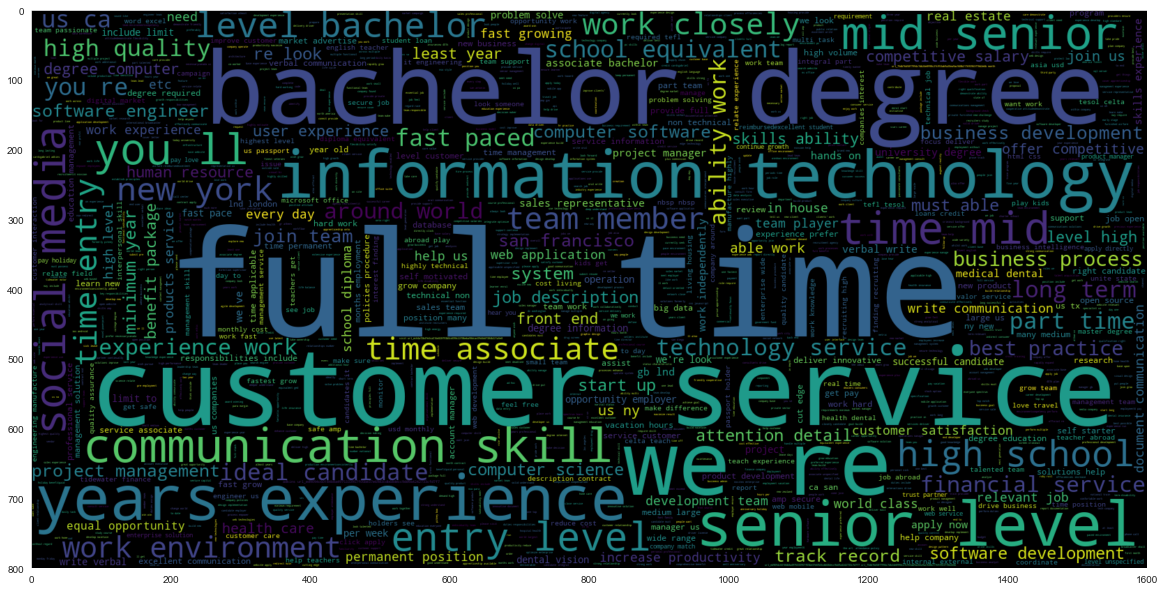

In [186]:

plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.fraudulent == 0].last_text))
plt.imshow(wc , interpolation = 'bilinear')

In the below image, we are going to see which keyword groups consist of fake job postings.

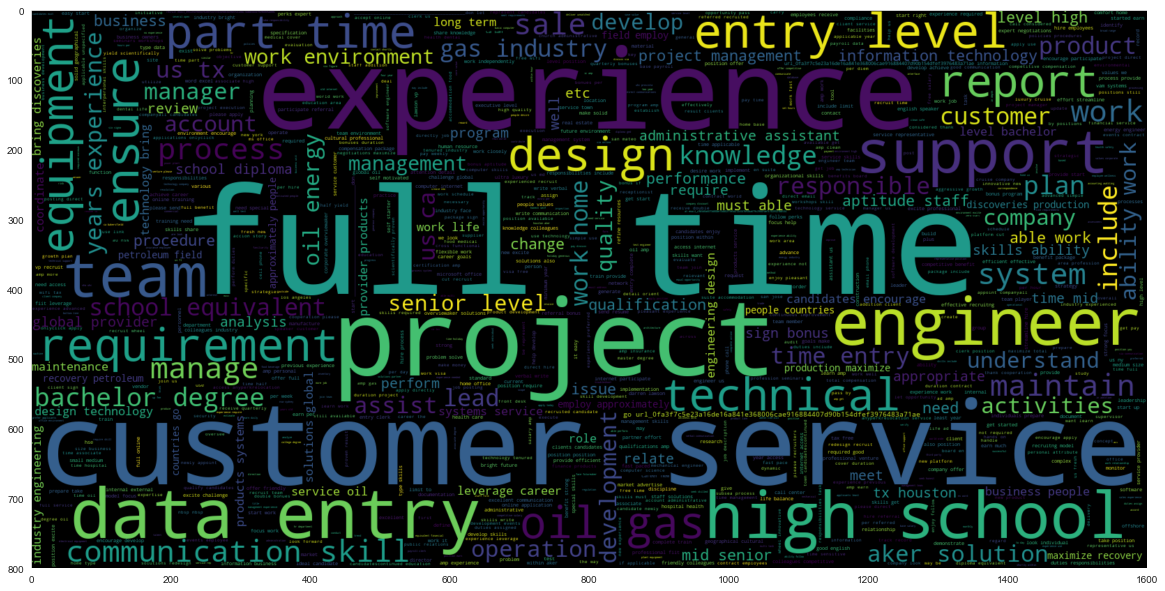

In [187]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.fraudulent == 1].last_text))
plt.imshow(wc , interpolation = 'bilinear')

## 4) Transforming anf Vectorizing the all_text

After the preprocessing part, I need to have test and training data all set up. So, I start by splitting data and use a test size of 0.30. Now, I can create vectorized representations of the all_text. 

In [188]:
y = data["fraudulent"]

In [189]:
X_train, X_test, y_train, y_test = train_test_split(data["last_text"], y, random_state=0, test_size=.30)

In [190]:
count_vectorizer = CountVectorizer(stop_words="english", min_df=0.05, max_df=0.9)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", min_df=0.05, max_df=0.9)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [191]:
print(count_train.shape)
print(count_test.shape)
print(tfidf_train.shape)
print(tfidf_test.shape)


(12516, 743)
(5364, 743)
(12516, 743)
(5364, 743)


### 5) Modelling with training a multinomial naive bayes model

So, I have vectorized data. I can train the multinomial naive Bayes model. And, we are going to see the accuracy results. The accuracy score is %96 which is a very good score for the naive classifier.

In [192]:

# Create a MulitnomialNB model
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)
# ... Train your model here ...

# Run predict on your TF-IDF test data to get your predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy of your predictions
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

# Create a MulitnomialNB model
count_nb = MultinomialNB()
# ... Train your model here ...
count_nb.fit(count_train, y_train)
# Run predict on your count test data to get your predictions
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy of your predictions
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)
tf_nb = confusion_matrix(y_test, tfidf_nb_pred)
c_nb = confusion_matrix(y_test, count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.9610365398956003
NaiveBayes Count Score:  0.866331096196868


I try out another classifier which is Linear svc. 

LinearSVC Score:   0.979


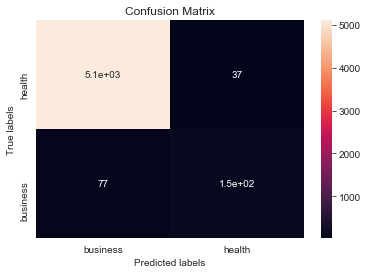

In [118]:

# Create a LinearSVM model
tfidf_svc = LinearSVC()

# ... Train your model here ...
tfidf_svc.fit(tfidf_train, y_train)
# Run predict on your tfidf test data to get your predictions
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculate your accuracy using the metrics module
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Calculate the confusion matrices for the tfidf_svc model

svc_cm = confusion_matrix(y_test, tfidf_svc_pred)

    

ax= plt.subplot()
sns.heatmap(svc_cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Predicting the sentiment for the documents in our test set I can use the predicting method of the RandomForestClassifier class as shown below and I got a very high accuracy score.

In [193]:

rf = RandomForestClassifier(bootstrap=True)

rf.fit(tfidf_train, y_train)

# Cross validation of 5 folds
score = cross_val_score(rf, tfidf_train, y_train)

print(f'Prediction score: {np.mean(score) * 100:.2f}%')

Prediction score: 97.30%


### 6) Evaluating my model using a confusiın matrix
The confusion matrix gives additional insight into accuracy by class and intuition for precision and recalls efficiency. And, we are going to see them that is so high efficiency. From the output, it can be seen that our model achieved an accuracy of 97.3%, which is very good given the fact that we randomly chose all the parameters for CountVectorizer as well as for our random forest algorithm.

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tfidf_nb_pred, target_names = ['0','1']))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5137
           1       0.91      0.09      0.16       227

    accuracy                           0.96      5364
   macro avg       0.94      0.54      0.57      5364
weighted avg       0.96      0.96      0.95      5364



In [195]:
print(classification_report(y_test, tfidf_svc_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5137
           1       0.80      0.66      0.72       227

    accuracy                           0.98      5364
   macro avg       0.89      0.83      0.86      5364
weighted avg       0.98      0.98      0.98      5364



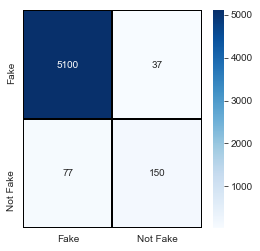

In [204]:
plt.figure(figsize = (4,4))
sns.heatmap(svc_cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Not Fake'] , yticklabels = ['Fake','Not Fake'])

In below the plots, we are going to benchmark other models using a confusion matrix. 

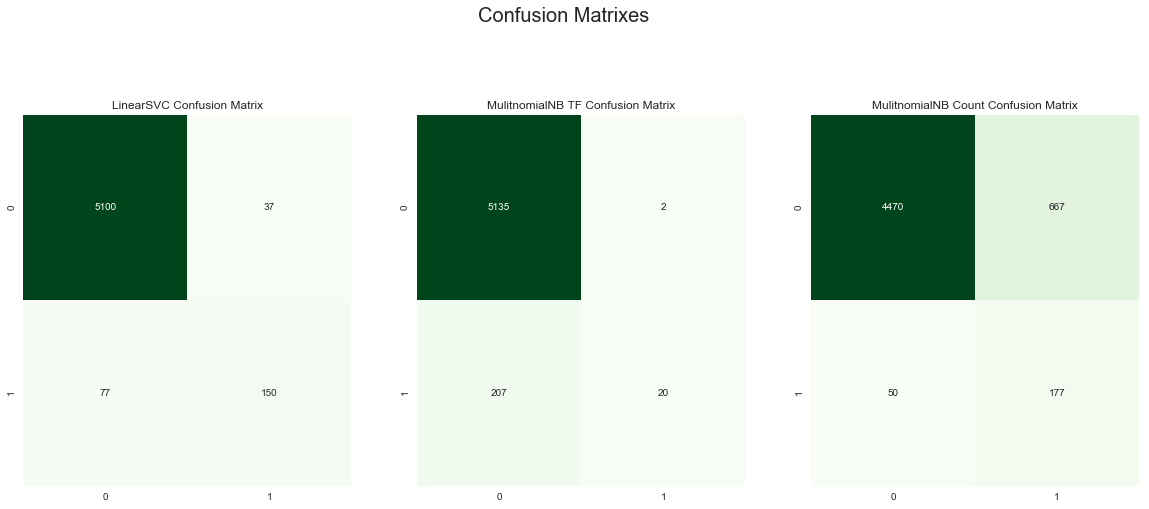

In [205]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("LinearSVC Confusion Matrix")
sns.heatmap(svc_cm,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,2)
plt.title("MulitnomialNB TF Confusion Matrix")
sns.heatmap(tf_nb,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,3)
plt.title("MulitnomialNB Count Confusion Matrix")
sns.heatmap(c_nb,cbar=False,annot=True,cmap="Greens",fmt="d")


plt.show()

IN ADDITION: All_text full data visualization

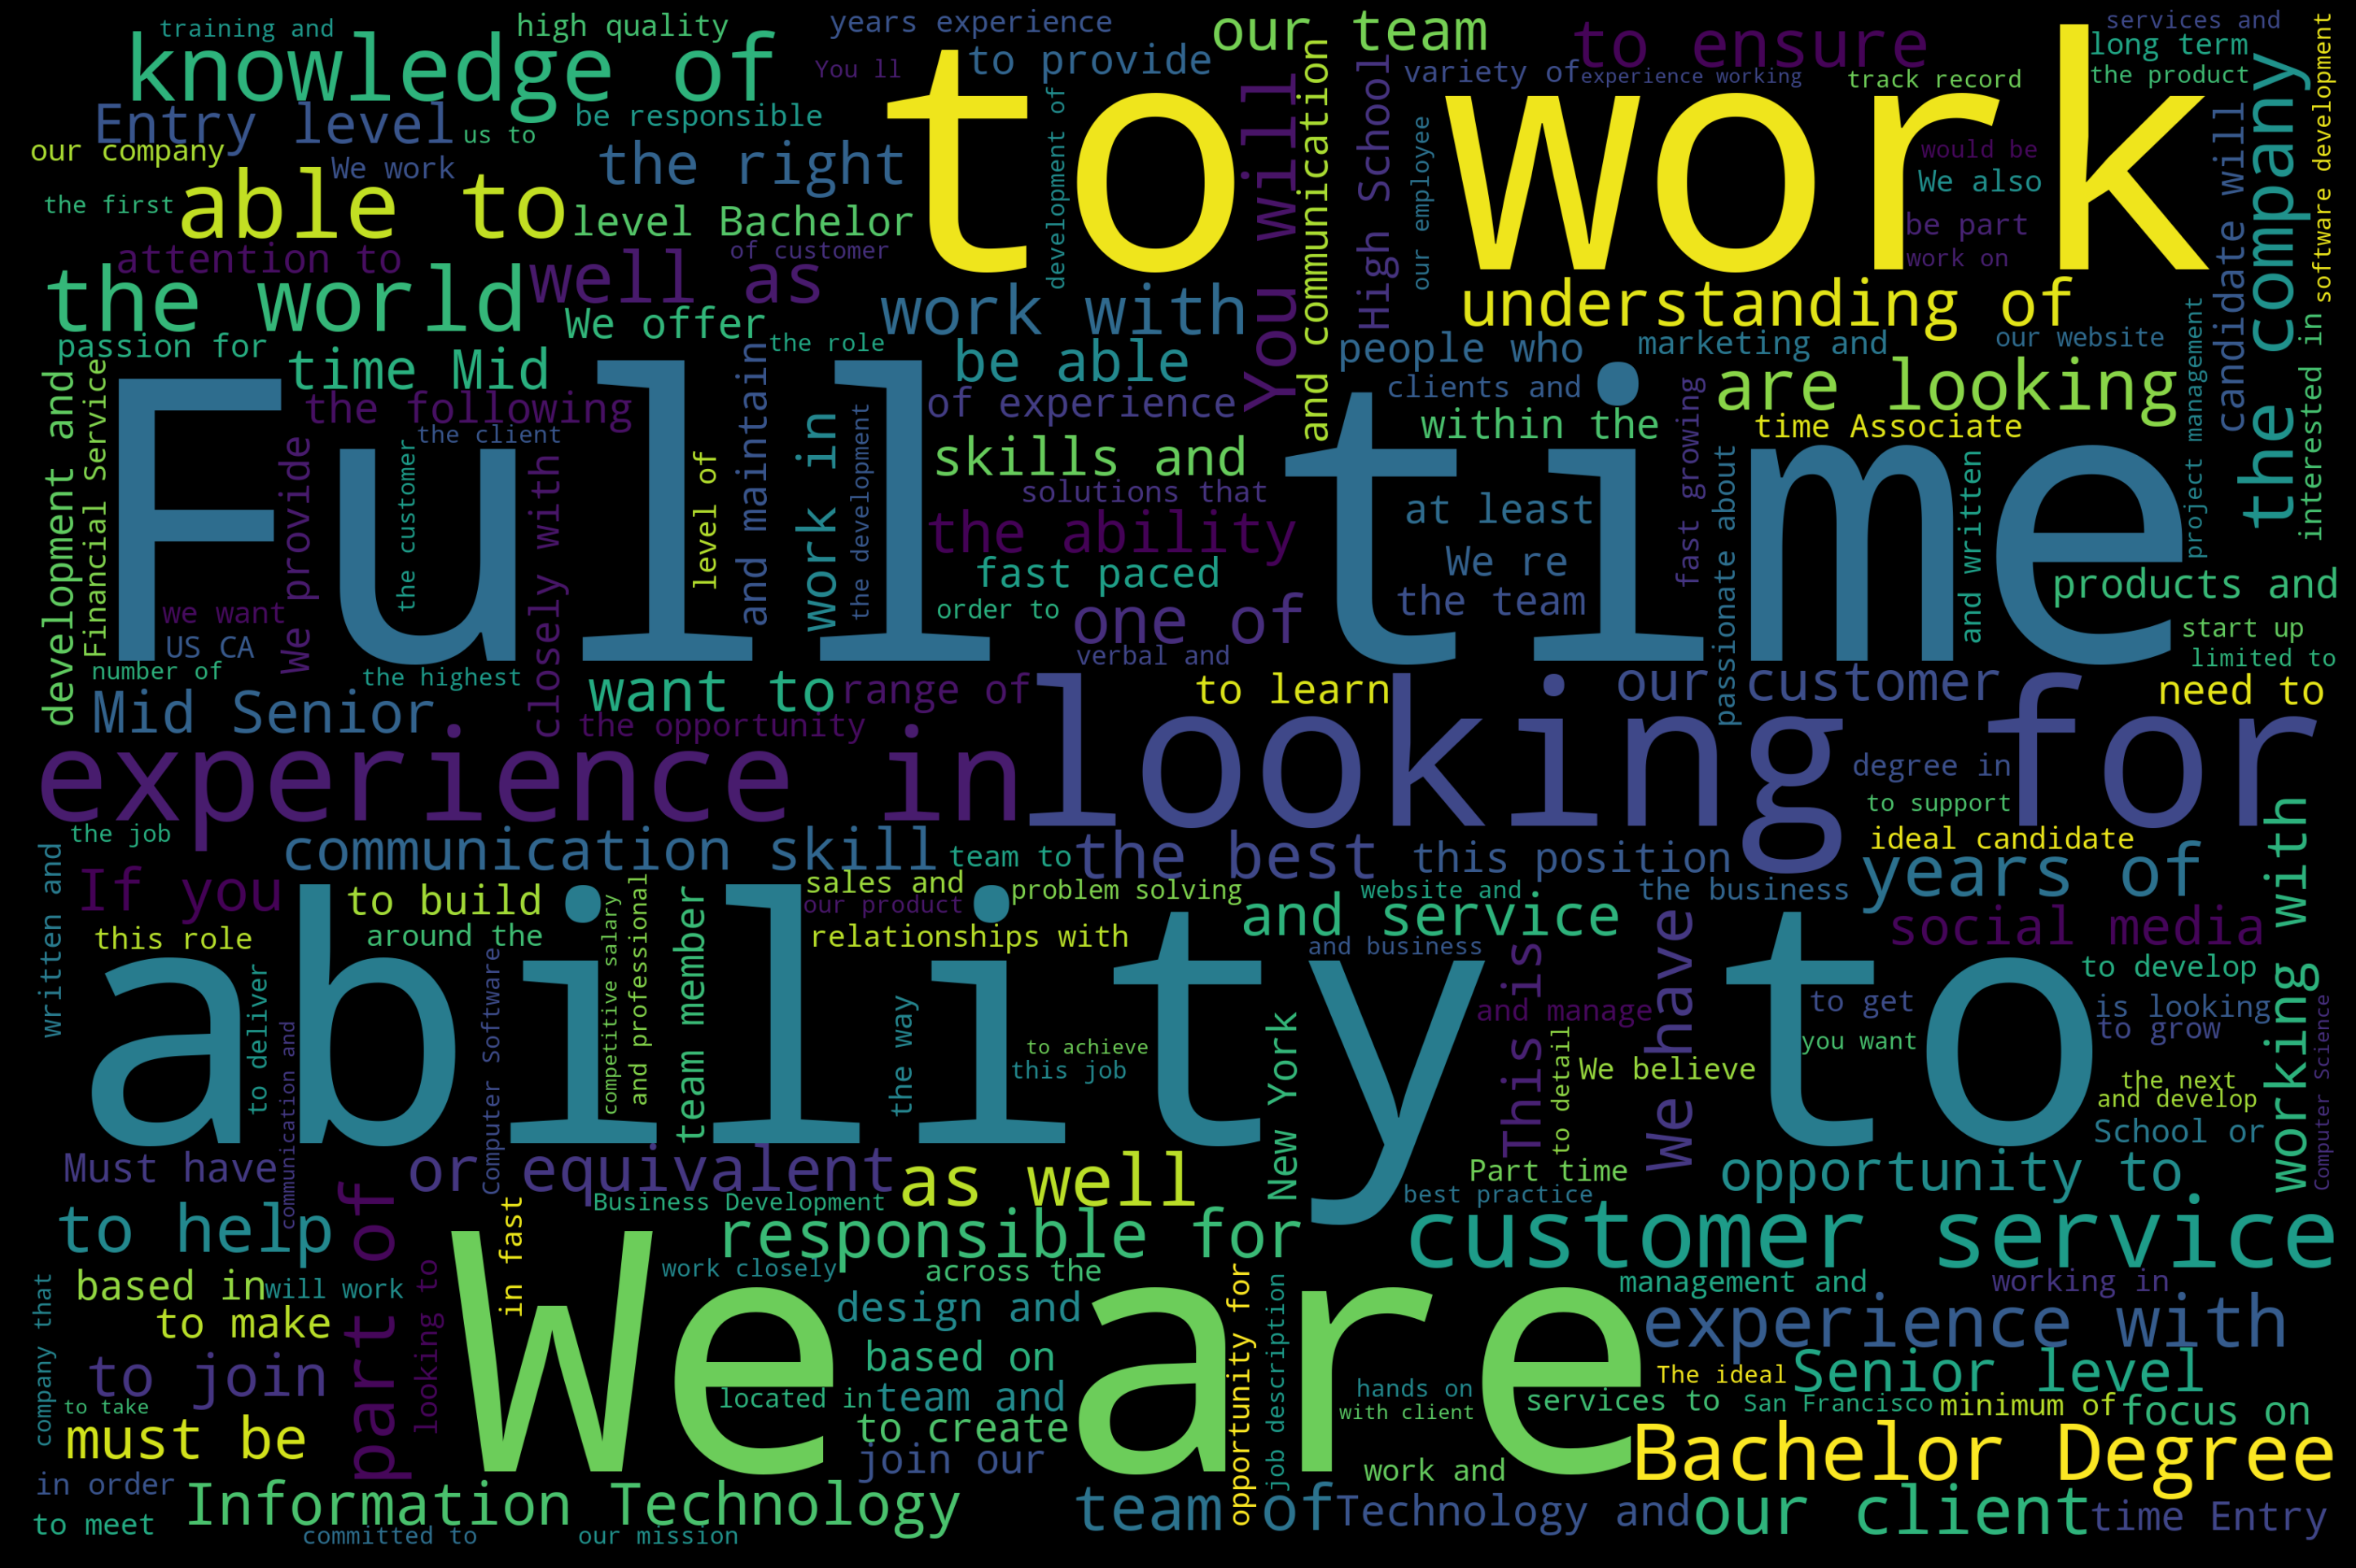

In [148]:
text = ''
for news in data.all_text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

### 7) Conclusion

At the beginning of the project, I start with importing and cleaning data. After that, I continue with preprocessing by doing text cleaning. So, I prepare my dataset to build a model. I used my model into a fake job dataset. At the end of the project, I compare and evaluate the models using a confusion matrix. The results, the highest accuracy score is LinearSVC model. And, when we looked at the confusion matrix scores, true positive is so high to others in every model, and false negative and false positive is very low. So, we are going to which are real and fake. 

### 8) Reference
[Kaggle notebooks](https://www.kaggle.com/madz2000/text-classification-using-keras-nb-97-accuracy) and
[Text classification pages](https://stackabuse.com/text-classification-with-python-and-scikit-learn/)